In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns

In [ ]:
course_chapter_items_df = pd.read_csv('./data/course_chapter_items.csv')
course_df = pd.read_csv('./data/courses.csv')
users_df = pd.read_csv('./data/users.csv')
subgroups_df = pd.read_csv('./data/subgroups.csv')

train_group_df = pd.read_csv('./data/train_group.csv')
test_seen_group_df = pd.read_csv('./data/test_seen_group.csv')
val_seen_group_df = pd.read_csv('./data/val_seen_group.csv')
test_unseen_group_df = pd.read_csv('./data/test_unseen_group.csv')
val_unseen_group_df = pd.read_csv('./data/val_unseen_group.csv')

train_df = pd.read_csv('./data/train.csv')
test_seen_df = pd.read_csv('./data/test_seen.csv')
val_seen_df = pd.read_csv('./data/val_seen.csv')
test_unseen_df = pd.read_csv('./data/test_unseen.csv')
val_unseen_df = pd.read_csv('./data/val_unseen.csv')

(0.0, 3.0, 0.9, 1.2)

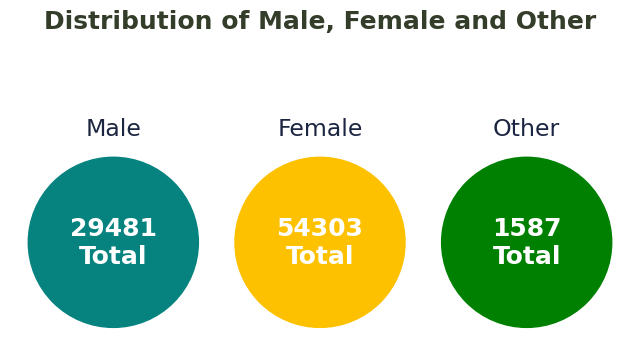

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(x=[0.5, 1.5, 2.5], y=[1,1,1], s=15000, color=['#06837f', '#fdc100', 'green'])
plt.xlim(0,3)
plt.ylim(0.9,1.2)

plt.title('Distribution of Male, Female and Other', fontsize=18, weight=600, color='#333d29')
plt.text(0.5, 1, '{}\nTotal'.format(str(len(users_df[users_df['gender']=='male']))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(1.5, 1, '{}\nTotal'.format(str(len(users_df[users_df['gender']=='female']))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(2.5, 1, '{}\nTotal'.format(str(len(users_df[users_df['gender']=='other']))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(0.5, 1.11, 'Male', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')
plt.text(1.5, 1.11, 'Female', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')
plt.text(2.5, 1.11, 'Other', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')

plt.axis('off')

### subgroup2idx

In [ ]:
subgroups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subgroup_id    91 non-null     int64 
 1   subgroup_name  91 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [ ]:
subgroups2idx = {}
for (id, name) in zip(subgroups_df["subgroup_id"], subgroups_df["subgroup_name"]):
    subgroups2idx.update({name: id})

subgroups2idx

{'更多生活品味': 1,
 '護膚保養與化妝': 2,
 '平面設計': 3,
 '繪畫與插畫': 4,
 '電腦繪圖': 5,
 '應用設計': 6,
 '求職': 7,
 '英文': 8,
 '手作小物': 9,
 'DJ': 10,
 '更多音樂': 11,
 '更多藝術': 12,
 '烹飪料理與甜點': 13,
 '壓力舒緩': 14,
 '運動': 15,
 '親子教育': 16,
 '手工印刷': 17,
 '手工書': 18,
 '動態攝影': 19,
 '素描': 20,
 '樂器': 21,
 '色彩學': 22,
 '字體設計': 23,
 '手寫字': 24,
 '動態設計': 25,
 '音樂理論': 26,
 '刺繡': 27,
 '日文': 28,
 '心靈成長與教育': 29,
 '音樂創作': 30,
 '氣球': 31,
 '程式入門': 32,
 '程式語言': 33,
 '網頁前端': 34,
 '文書處理': 35,
 '角色設計': 36,
 '資料彙整': 37,
 '介面設計': 38,
 '網頁設計': 39,
 '商業攝影': 40,
 '網站架設': 41,
 '更多程式': 42,
 '程式思維': 43,
 '手機程式開發': 44,
 '韓文': 45,
 '更多手作': 46,
 '更多語言': 47,
 '歐洲語言': 48,
 '人聲': 49,
 '個人品牌經營': 50,
 '更多職場技能': 51,
 '網頁後端': 52,
 '後製剪輯': 53,
 '產品設計': 54,
 '靈性發展': 55,
 '影視創作': 56,
 '資料科學': 57,
 '軟體程式開發與維護': 58,
 '職場溝通': 59,
 '表演藝術': 60,
 '創業': 61,
 '文學': 62,
 '區塊鏈': 63,
 '金融商品': 64,
 '文案': 65,
 '數位行銷': 66,
 '設計理論': 67,
 'AI 人工智慧': 68,
 '投資觀念': 69,
 '理財': 70,
 '社會科學': 71,
 '社群行銷': 72,
 '影像創作': 73,
 '遊戲開發': 74,
 '程式理財': 75,
 '量化交易': 76,
 '更多設計': 77,
 '獨立接案': 78,
 '寵

In [ ]:
df = users_df.fillna("None")
# interest_df = users_df["interests"].fillna("None")
interest_df = df["interests"]
gender_df = df["gender"]

male_interest_list = []
female_interest_list = []
other_interest_list = []

for gender, interest in zip(gender_df, interest_df):
    if gender == "None":
        continue
    if gender == "male":
        male_interest_list.extend(interest.split(', '))
    elif gender == "female":
        female_interest_list.extend(interest.split(', '))
    elif gender == "other":
        other_interest_list.extend(interest.split(', '))


#### add interest to each gender

In [ ]:
other_interest_num = []
male_interest_num = []
female_interest_num = []

for interest in other_interest_list:
    for i in interest.split(","):
        if i == "None":
            other_interest_num.append("None")
            continue
        name = i.split("_")[1]
        other_interest_num.append(name)

for interest in male_interest_list:
    for i in interest.split(","):
        if i == "None":
            male_interest_num.append("None")
            continue
        name = i.split("_")[1]
        male_interest_num.append(name)

for interest in female_interest_list:
    for i in interest.split(","):
        if i == "None":
            female_interest_num.append("None")
            continue
        name = i.split("_")[1]
        female_interest_num.append(name)

In [ ]:
other_interest_num = []
male_interest_num = []
female_interest_num = []
unseen_interest = []

for interest in other_interest_list:
    for i in interest.split(","):
        if i == "None":
            other_interest_num.append(0)
            continue
        name = i.split("_")[1]
        if name not in subgroups2idx.keys():
            unseen_interest.append(i)
            continue
        other_interest_num.append(subgroups2idx[name])

for interest in male_interest_list:
    for i in interest.split(","):
        if i == "None":
            male_interest_num.append(0)
            continue
        name = i.split("_")[1]
        if name not in subgroups2idx.keys():
            unseen_interest.append(i)
            continue
        male_interest_num.append(subgroups2idx[name])

for interest in female_interest_list:
    for i in interest.split(","):
        if i == "None":
            female_interest_num.append(0)
            continue
        name = i.split("_")[1]
        if name not in subgroups2idx.keys():
            unseen_interest.append(i)
            continue
        female_interest_num.append(subgroups2idx[name])

Counter(unseen_interest)
# 語言_西班牙文 -> 更多語言(47), 歐洲語言(48)
# 手作_篆刻 -> 手作小物(9), 手工印刷(17), 手工書(18), 手寫字(24), 更多手作(46), 字體設計(23)
# 投資理財_更多投資理財 -> 量化交易(76), 程式理財(75), 理財(70), 投資觀念(69), 量化分析(81), 數據分析(87)
# 投資理財_比特幣 -> 區塊鏈(63), 金融商品(64), 數位行銷(66), 投資觀念(69), 理財(70), 程式理財(75), 量化交易(76), 數據分析(87)

Counter({'手作_篆刻': 1913,
         '語言_西班牙文': 4050,
         '投資理財_更多投資理財': 5203,
         '投資理財_比特幣': 2612})

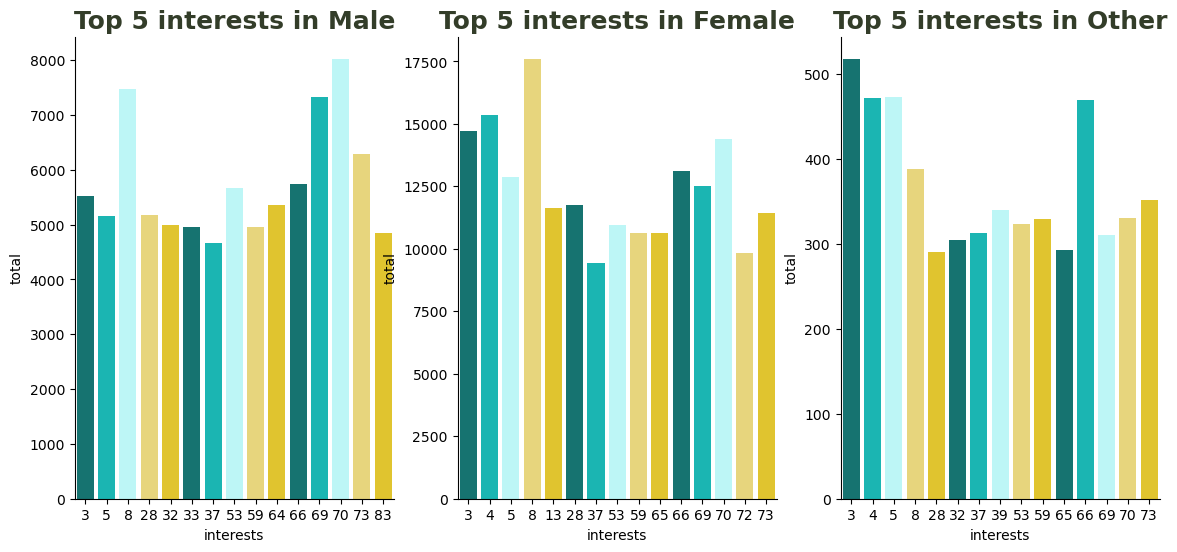

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,6))

male_interest_plot = pd.DataFrame(Counter(male_interest_num).most_common(15), columns=['interests', 'total'])
female_interest_plot = pd.DataFrame(Counter(female_interest_num).most_common(15), columns=['interests', 'total'])
other_interest_plot = pd.DataFrame(Counter(other_interest_num).most_common(15), columns=['interests', 'total'])
ax1 = sns.barplot(data=male_interest_plot, x='interests', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax2 = sns.barplot(data=female_interest_plot, x='interests', y='total', ax=axes[1], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax3 = sns.barplot(data=other_interest_plot, x='interests', y='total', ax=axes[2], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax1.set_title('Top 5 interests in Male', fontsize=18, weight=600, color='#333d29')
ax2.set_title('Top 5 interests in Female', fontsize=18, weight=600, color='#333d29')
ax3.set_title('Top 5 interests in Other', fontsize=18, weight=600, color='#333d29')
sns.despine()

In [ ]:
other_interest_num = []
male_interest_num = []
female_interest_num = []
investment = [69, 70, 75, 76, 87]
crypto_coin = [63, 64, 66]
for interest in other_interest_list:
    for i in interest.split(","):
        if i == "None":
            other_interest_num.append(0)
            continue
        name = i.split("_")[1]
        if name == "篆刻":
            continue
        if name == "西班牙文":
            other_interest_num.append(47)
            other_interest_num.append(48)
            continue
        if name == "更多投資理財":
            other_interest_num.append(id for id in investment)
            other_interest_num.append(81)
            continue
        if name == "比特幣":
            other_interest_num.append(id for id in investment)
            other_interest_num.append(id for id in crypto_coin)
            continue
        other_interest_num.append(subgroups2idx[name])

for interest in male_interest_list:
    for i in interest.split(","):
        if i == "None":
            male_interest_num.append(0)
            continue
        name = i.split("_")[1]
        if name == "篆刻":
            continue
        if name == "西班牙文":
            male_interest_num.append(47)
            male_interest_num.append(48)
            continue
        if name == "更多投資理財":
            male_interest_num.append(id for id in investment)
            male_interest_num.append(81)
            continue
        if name == "比特幣":
            male_interest_num.append(id for id in investment)
            male_interest_num.append(id for id in crypto_coin)
            continue
        male_interest_num.append(subgroups2idx[name])

for interest in female_interest_list:
    for i in interest.split(","):
        if i == "None":
            female_interest_num.append(0)
            continue
        name = i.split("_")[1]
        if name == "篆刻":
            continue
        if name == "西班牙文":
            female_interest_num.append(47)
            female_interest_num.append(48)
            continue
        if name == "更多投資理財":
            female_interest_num.append(id for id in investment)
            female_interest_num.append(81)
            continue
        if name == "比特幣":
            female_interest_num.append(id for id in investment)
            female_interest_num.append(id for id in crypto_coin)
            continue
        female_interest_num.append(subgroups2idx[name])

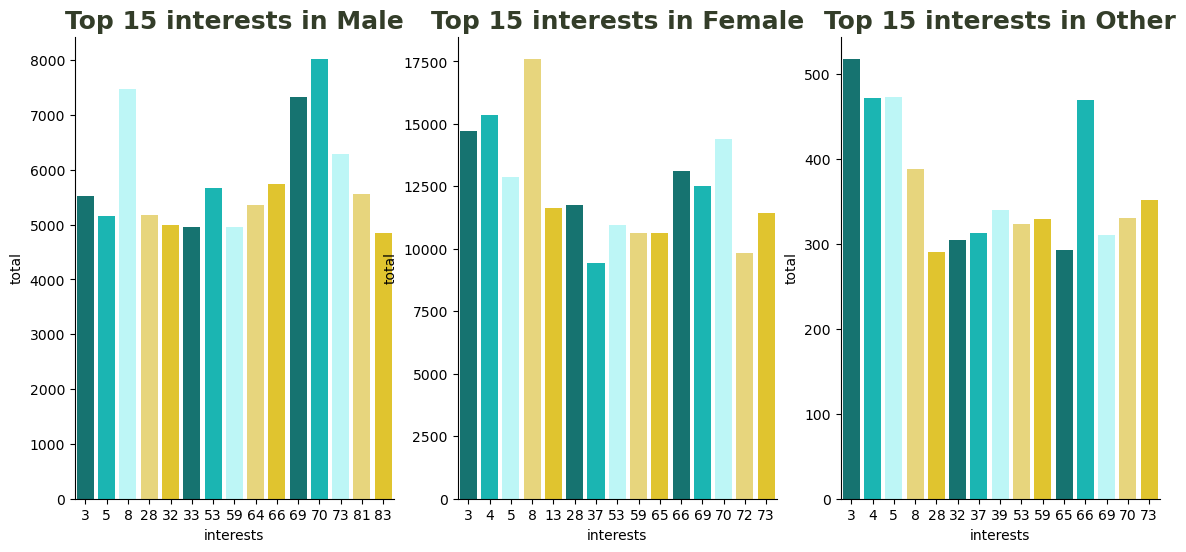

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,6))

male_interest_plot = pd.DataFrame(Counter(male_interest_num).most_common(15), columns=['interests', 'total'])
female_interest_plot = pd.DataFrame(Counter(female_interest_num).most_common(15), columns=['interests', 'total'])
other_interest_plot = pd.DataFrame(Counter(other_interest_num).most_common(15), columns=['interests', 'total'])
ax1 = sns.barplot(data=male_interest_plot, x='interests', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax2 = sns.barplot(data=female_interest_plot, x='interests', y='total', ax=axes[1], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax3 = sns.barplot(data=other_interest_plot, x='interests', y='total', ax=axes[2], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax1.set_title('Top 15 interests in Male', fontsize=18, weight=600, color='#333d29')
ax2.set_title('Top 15 interests in Female', fontsize=18, weight=600, color='#333d29')
ax3.set_title('Top 15 interests in Other', fontsize=18, weight=600, color='#333d29')
sns.despine()